In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
x_train = np.linspace(0.,1.,10) # training set
x_valid = np.linspace(0.,1.,100) # validation set

np.random.seed(2455) #student number = 400072455

t_valid = np.sin(4*np.pi*x_valid) + 0.3 * np.random.randn(100)
t_train = np.sin(4*np.pi*x_train) + 0.3 * np.random.randn(10)

(1, 1000)


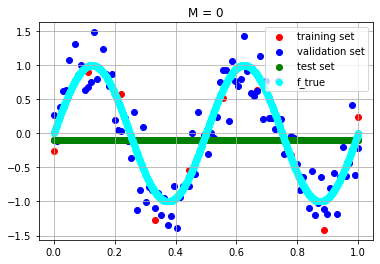

(1, 1000)


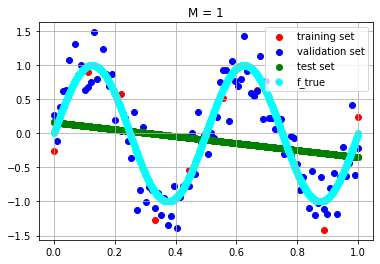

(1, 1000)


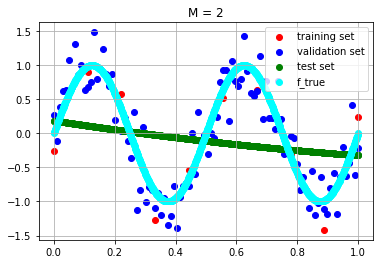

(1, 1000)


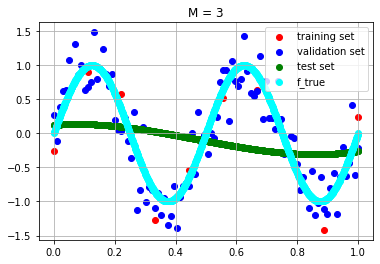

(1, 1000)


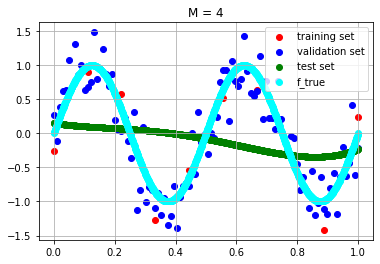

(1, 1000)


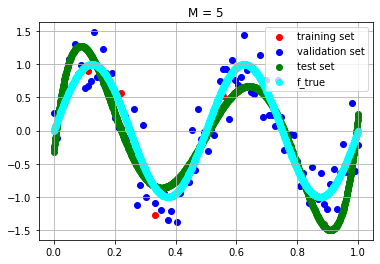

(1, 1000)


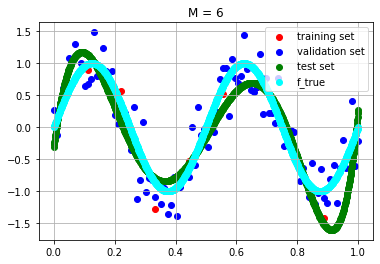

(1, 1000)


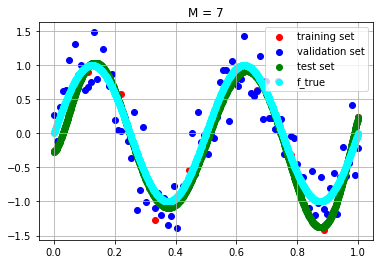

(1, 1000)


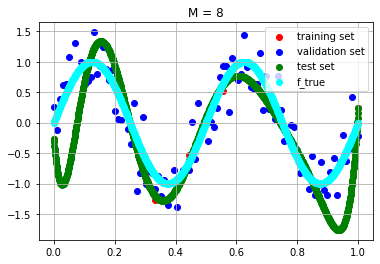

(1, 1000)


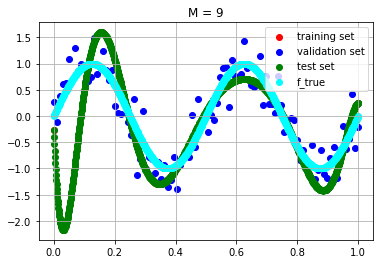

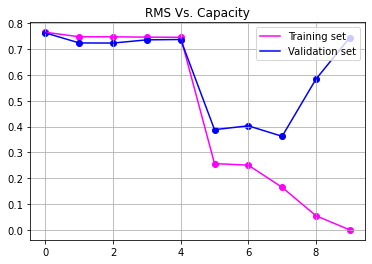

In [162]:
N = len(x_train) # length of training set
M = len(x_valid) # length of validation set

#print(N) 
#print(M) 

errTrain = np.zeros(N) 
errValid = np.zeros(N)

# looping through each capacity for the model 
for D in range (0, 10, 1):
    errTrain[D], errValid[D], w = err_calc(D, N, x_train, t_train, x_valid, t_valid) #building the model
#err = err_calc(t_valid, t_result)

#*******Debugging print statementes**********
#print("Training errors:", errTrain)
#print("Validation errors:",errValid)

gen_RMS_plot(errTrain, errValid)


RMS train: 20 [[1101.97203844]]
RMS valid: 20 [[1161.12914858]]
RMS train: 21 [[407.51981438]]
RMS valid: 21 [[466.67692451]]
RMS train: 22 [[152.04511827]]
RMS valid: 22 [[211.2022284]]
RMS train: 23 [[58.06122983]]
RMS valid: 23 [[117.21833996]]
RMS train: 24 [[23.48648947]]
RMS valid: 24 [[82.6435996]]
RMS train: 25 [[10.76715331]]
RMS valid: 25 [[69.92426344]]
RMS train: 26 [[6.08797103]]
RMS valid: 26 [[65.24508116]]
RMS train: 27 [[4.36659607]]
RMS valid: 27 [[63.5237062]]
RMS train: 28 [[3.73333761]]
RMS valid: 28 [[62.89044774]]
RMS train: 29 [[3.50037484]]
RMS valid: 29 [[62.65748497]]


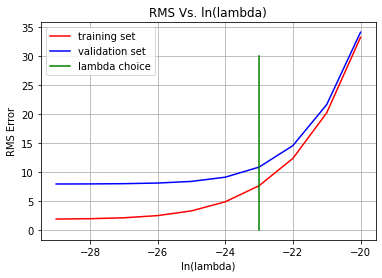

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_col = np.array([x_train])

ones_col = np.ones(N)
ones = np.array([ones_col])

XX_train = np.array([x_train])

for i in range(2, N, 1):
    XX_train = np.insert(X_train_col**i, 0, XX_train, axis = 0)

XX_train = XX_train.T

#*******Debugging print statementes**********
#print("XX_train:", XX_train)
#print("XX_train shape:", XX_train.shape)

ones_col = np.ones(M)
ones = np.array([ones_col])

XX_valid = np.array([x_valid])
X_valid_col = np.array([x_valid])

for i in range(2, N, 1):
    XX_valid = np.insert(X_valid_col**i, 0, XX_valid, axis = 0)

XX_valid = XX_valid.T

#*******Debugging print statementes**********
#print("XX_valid:", XX_valid)
#print("XX_valid shape:", XX_valid.shape)

XX_train = sc.fit_transform(XX_train)
XX_valid = sc.transform(XX_valid)

#*******Debugging print statementes**********
#print(XX_train)
#print("XX_train shape:", XX_train.shape)
#print(XX_valid)
#print("XX_valid shape:", XX_valid.shape)

#print(w)
gen_standardize(XX_train, XX_valid, t_train, t_valid, w, N, M)

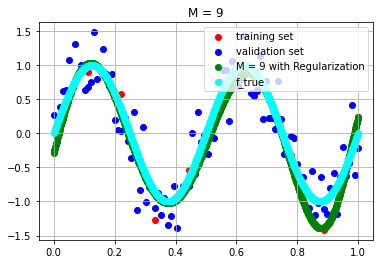

Average loss: 0.11895424742994054


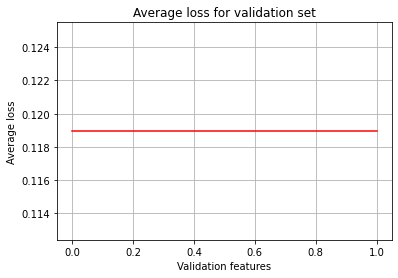

In [164]:
w_Reg = gen_Reg_plot(x_train, t_train, N, -23)
gen_avgLoss_plot(x_valid, t_valid, w_Reg, N)

In [154]:
###### function to create the W-parameter and calculate the training error
# *********************************Parameters***********************************
# D: capacity
# N: number of 
# x_train: x-values from training set
# t_train: t-values from training set

def err_calc(D, N, x_train, t_train, x_valid, t_valid): 
    #*******Definition comments**********
    # w = [(X^T*X)^-1]*(X^T*t)
    # w_partA = (X^T*X)^-1
    # w_partB = (X^T*t)
    
    one_vec = np.ones(N) # N-number of ones in a row matrix
    one_col = np.array([one_vec]) # creating N-number of ones in a column matrix
    
    #*******Debugging print statementes**********
    #print(one_col)
    #print(one_col.shape)
    
    x_insert = np.array([x_train]) # creating training set column from training set row
    
    #*******Debugging print statementes**********
    #print(x_insert)
    #one_col = np.insert(x_insert, 0, one_col, axis = 0)
    
    for i in range(1,D+1,1): #inserting rows depending on the capacity
        one_col = np.insert(x_insert**i, 0, one_col, axis = 0) 
        
        #*******Debugging print statementes**********
        #print("in for-loop")***
        #print("x_insert:",x_insert**i)
        
    #*******Debugging print statementes**********
    #print(one_col.shape)
    #print(one_col)
    
    X = one_col # creating the X matrix to be used for calculation of W-parameter
    
    #*******Debugging print statementes**********
    #print(x_insert)
    #print("X matrix:",X)
    #print(X.shape)
    #print(X.T)
    
    xA_dot = np.dot(X,X.T) # creating the dot product for w_partA
    
    #*******Debugging print statementes**********
    #print(xA_dot.shape)
    #print("xA_dot:",xA_dot)
    #print("xA_dot:", np.linalg.det(xA_dot))
    #print("Matrix Rank",np.linalg.matrix_rank(xA_dot))
    
    w_partA = np.linalg.inv(xA_dot) # w_partA of the W-parameter
    
    #*******Debugging print statementes**********
    #print("Shape of w_partA:",w_partA.shape)
    #print(w_partA)    

    t_col = np.array([t_train]) # creating a column for the t-values from the training set
    
    #*******Debugging print statementes**********
    #print(t_col)
    #print(t_col.shape)
    
    w_partB = np.dot(t_col, X.T) # w_partB of the W-parameter
    
    #*******Debugging print statementes**********
    #print("Shape of w_partB:",w_partB.shape)
    #print(w_partB)
    
    w = np.dot(w_partB, w_partA) # creating the W-parameter
    
    #*******Debugging print statementes**********
    #print("Shape of w-parameter:",w.shape)
    #print("W-matrix", w)
    
    #*******Definition comments**********
    # err = [(y-t)^T*(y-t)]/N
    # err_partA = (Xw-t)^T
    # err_partB = (Xw-t)
    
    errTrain_partA = (np.dot(w, X) - t_train).T # err_partA of the err variable
    errTrain_partB = np.dot(w, X) - t_train # err_partB of the err variable
    errTrain = np.dot(errTrain_partB, errTrain_partA)/N # creating the err variable
    Root_errTrain = np.sqrt(errTrain) # creating the root mean squared error 
    
    #*******Debugging print statementes**********
    #print("Training Error:", D, errTrain)
    #print("Training Root Error:", D, Root_errTrain)
    
    N_val = len(x_valid) # length of the validation set 
    one_vec = np.ones(N_val) # creating a zero-row matrix for the length of x_valid
    one_col = np.array([one_vec]) # creating a column for the zero-row matrix of x_valid
    x_insert = np.array([x_valid]) # creating a column for the validation set
    
    for i in range(1,D+1,1): #inserting rows depending on the capacity
        one_col = np.insert(x_insert**i, 0, one_col, axis = 0) 
    
    X_valid = one_col
    
    #*******Debugging print statementes**********
    #print(X_valid)
    #print(X_valid.shape)
    
    errValid_partA = (np.dot(w, X_valid) - t_valid).T 
    errValid_partB = np.dot(w, X_valid) - t_valid
    errValid = np.dot(errValid_partB, errValid_partA)/N_val
    Root_errValid = np.sqrt(errValid)
    
    #*******Debugging print statementes**********
    #print("Validation Error:", D, errValid)
    #print("Validation Root Error:", D, Root_errValid)
    
    gen_Model_plot(w, D, x_train, t_train, x_valid, t_valid)
    
    return Root_errTrain, Root_errValid, w

In [155]:
###### function to generate the plots for the RMS values to the corresponding capacity
# *********************************Parameters**********************************************
# Root_errTrain: the RMS error for the training set
# Root_errValid: the RMS error for the validation set

def gen_RMS_plot(Root_errTrain, Root_errValid):
    x_axis = np.linspace(0, 9, 10) # training set
    
    #*******Debugging print statementes**********
    #print(errTrain.shape)
    #print(errValid.shape)
    
    plt.title("RMS Vs. Capacity") # title for plot
    plt.plot(x_axis, Root_errTrain, color = "magenta", label = "Training set") # plotting a straight line for the RMS for the training set 
    plt.scatter(x_axis, Root_errTrain, color = "magenta") # plotting the points for the RMS for the training set
    plt.plot(x_axis, Root_errValid, color = "blue", label = "Validation set") # plotting a straight line for the RMS for validation set  
    plt.scatter(x_axis, Root_errValid, color = "blue") # plotting the points for the RMS for the valdiation set
    plt.legend(loc = "upper right") # adding a legend for the data
    plt.grid() # adding a grid for the new plot
    plt.show()

In [156]:
###### function to generate the Models created 
# *********************************Parameters**********************************************
# w: Parameters for the models
# D: capacity of the model being generated
# x_train: training set features
# t_train: training set labels
# x_valid: validation set features
# t_valid: validation set labels

def gen_Model_plot(w, D, x_train, t_train, x_valid, t_valid):
    x_test = np.linspace(0, 1, 1000) # creating a testing set
    length = len(x_test) # creating a variable with the length of the testing set
    x_test = np.array([x_test]) # creating a column for the testing set
    
    one_vec = np.ones(length) # creating a zero-row matrix with the length of the test set
    one_col = np.array([one_vec]) # creating a zero-column matrix with the length of the test set
    for i in range(1,D+1,1): #inserting rows depending on the capacity
        one_col = np.insert(x_test**i, 0, one_col, axis = 0) 
        
    X = one_col # creating the X variable to used to calculate f
    
    #*******Debugging print statementes**********
    #print(X)
    #print(X.shape)
    
    f = np.dot(w, X) # getting the values for the test set for the trained model
    f_true = np.sin(4*np.pi*x_test) # the true function
    
    #*******Debugging print statementes**********
    #print(f)
    print(f.shape)
    
    plt.title("M = %s" % D) # title for plot
    plt.scatter(x_train, t_train, color = "red", label = "training set") # plotting the points for the training set
    plt.scatter(x_valid, t_valid, color = "blue", label = "validation set") # plotting the points for the validation set
    plt.scatter(x_test, f, color = "green", label = "test set") # plotting the points for the test set
    plt.scatter(x_test, f_true, color = "cyan", label = "f_true") # plotting the true function
    plt.legend(loc = "upper right") # adding a legend for the data
    plt.grid() # adding a grid for the new plot
    plt.show()
    

In [157]:
###### function to calculate the standardized model parameter
# *********************************Parameters**********************************************
# XX_train: standardized training set features 
# XX_valid: standardized validation set features
# t_Train: training set labels
# t_Valid: validation set labels
# w: parameters from the previous model
# N: size of training set
# M: size of validation set

def gen_standardize(XX_train, XX_valid, t_Train, t_Valid, w, N, M):
    
    ones_train_col = np.array([np.ones(N)]) # creates a column of ones with N-length
    
    #*******Debugging print statementes**********
    #print(ones_train_col)
    #print(ones_train_col.shape)
    
    ones_valid_col = np.array([np.ones(M)]) # creates a column of ones with M-length
    
    #*******Debugging print statementes**********
    #print(ones_valid_col)
    #print(ones_valid_col.shape)
    
    #XX_train = np.array([XX_train])
    #XX_valid = np.array([XX_valid])
    
    X_train = np.insert(XX_train.T, 0, ones_train_col, axis = 0) # inserts the standardized x_train values to the ones column
    X_valid = np.insert(XX_valid.T, 0, ones_valid_col, axis = 0) # inserts the standardized x_valid values to the ones column
    
    #*******Debugging print statementes**********
    #print(X_train)
    #print(X_valid.shape)
    
    y_Train = np.dot(w, X_train) # calculating y-value for training set
    y_Valid = np.dot(w, X_valid) # calculating y-value for validation set
    
    #*******Debugging print statementes**********
    #print(y_Train)
    #print(y_Valid)
    #print("y_Train:",y_Train.shape)
    #print("y_Valid:",y_Valid.shape)
    
    #*******Definition comments**********
    # err = [(y-t)^T*(y-t)]/N
    # err_partA = (Xw-t)^T
    # err_partB = (Xw-t)
    
    #*******Debugging print statementes**********
    #print("y_train shape:",y_Train.shape)
    #print("y_valid shape:",y_Valid.shape)
    #print("t_train shape:",t_Train.shape)
    #print("t_Valid shape:",t_Valid.shape)
    
    T_train = np.array([t_Train]) # creating a column for the training set labels
    T_valid = np.array([t_Valid]) # creating a column for the validation set labels
    
    #*******Debugging print statementes**********
    #print("t_train shape:",T_train.shape)
    #print("t_Valid shape:",T_valid.shape)
    
    errTrain_partA = (y_Train - T_train).T # calculating the errTrain_partA for the training set error
    errTrain_partB = (y_Train - T_train) # calculating the errTrain_partB for the training set error
    
    errValid_partA = (y_Valid - T_valid).T # calculating the errValid_partA for the validation set
    errValid_partB = (y_Valid - T_valid) # calculating the errValid_partB for the validation set
    
    #*******Debugging print statementes**********
    #print("errTrain_partA shape:",errTrain_partA.shape)
    #print("errTrain_partB shape:",errTrain_partB.shape)
    #print("errValid_partA shape:",errValid_partA.shape)
    #print("errValid_partB shape:",errValid_partB.shape)
    
    errTrain = np.dot(errTrain_partB, errTrain_partA)/N # calculating the training set error
    errValid = np.dot(errValid_partB, errValid_partA)/N # calculating the validation set error
    
    #*******Debugging print statementes**********
    #print(errTrain)
    #print(errValid)
    #print(errTrain.shape)
    #print(errValid.shape)
    
    Root_errTrain = np.array([np.zeros(10)]).T # creating dummy array for the RMS error for the training set
    Root_errValid = np.array([np.zeros(10)]).T # creating dummy array for thee RMS error for the validation set
    
    #*******Debugging print statementes**********

    #print(Root_errTrain.shape)
    #print(Root_errValid.shape)
    
    w_weighted = 0 # variable to get the sum of the parameters weight

    for i in range(0, 10, 1):
        w_weighted += (w[0][i]**2)
        #print(w[0][i])
        
    #print(w_weighted)
    
    for i in range(20, 30, 1): # finding the RMS value for varying lambda values 
        Root_errTrain[i - 20][0] = np.sqrt(errTrain+(np.exp(-i)*w_weighted))
        Root_errValid[i - 20][0] = np.sqrt(errValid+(np.exp(-i)*w_weighted))
        print("RMS train:",i, errTrain+(np.exp(-i)*w_weighted))
        print("RMS valid:",i, errValid+(np.exp(-i)*w_weighted))
    #print(np.exp(-i)*w_weighted)
    
    #*******Debugging print statementes**********
    #print("RMS train:",Root_errTrain)
    #print("RMS valid:",Root_errValid)
    #print(Root_errTrain.shape)
    #print(Root_errValid.shape)
    
    ln_lambda = np.array([np.zeros(10)]).T # dummy array for ln(lambda) values to be use for graphing
    
    for i in range(20, 30, 1): # finding the ln(lambda) values 
        ln_lambda[i - 20][0] = np.log(np.exp(-i))
        
    #*******Debugging print statementes**********
    #print("Lambda:",ln_lambda)
    
    lambda_xline = np.full((1,30),-23).T # creating an array of 30 elements long with the value of "-23"
    lambda_yline = np.linspace(0,30,30) # creating an array with the range from 0-30
    
    plt.title("RMS Vs. ln(lambda)")
    plt.plot(ln_lambda, Root_errTrain, color = "red", label = "training set")  # plotting the RMS training error
    plt.plot(ln_lambda, Root_errValid, color = "blue", label = "validation set") # plotting the RMS validation error
    plt.plot(lambda_xline, lambda_yline, color = "green", label = "lambda choice") # plotting the chosen lambda value
    plt.legend(loc = "upper left") # adding a legend for the data
    plt.xlabel("ln(lambda)") # x-axis label
    plt.ylabel("RMS Error") # y-axis label
    plt.grid()
    plt.show()
    
    # choice of lambda = e^-23 from data and graph given from this graph 


In [158]:
###### function to generate the plot for the new regularized model
# *********************************Parameters**********************************************
# x_train: training set features
# t_train: training set labels
# D: model capacity
# lam: lambda value

def gen_Reg_plot(x_train, t_train, D, lam):
    
    T_train = np.array([t_train]) # creating an array for the training set labels
    
    x_test = np.linspace(0, 1, 1000) # creating a testing set
    length = len(x_test) # creating a variable with the length of the testing set
    x_test = np.array([x_test]) # creating a column for the testing set
    
    one_vec = np.ones(length) # creating a zero-row matrix with the length of the test set
    one_col = np.array([one_vec]) # creating a zero-column matrix with the length of the test set
    
    for i in range(1, D, 1): #inserting rows depending on the capacity
        one_col = np.insert(x_test**i, 0, one_col, axis = 0) 
        
    X_test = one_col # creating the X variable to used to calculate f
    
    #*******Debugging print statementes**********
    #print(X_test)
    #print(X_test.shape)
    
    ones_vec = np.ones(D) # creating an array of ones D-long
    one_col = np.array([ones_vec]) # creating a row of ones
    x_insert = np.array([x_train]) # creating a row of the training set
    
    #*******Debugging print statementes**********
    #print(one_col)
    #print(one_col.shape)
    
    #X_reg = np.insert(XX_train.T, 0, one_col, axis = 0)
    for i in range(1, D, 1): 
        one_col = np.insert(x_insert**i, 0, one_col, axis = 0)

    X_reg = one_col # creating the X term for the regularization values
    
    #*******Debugging print statementes**********
    #print(X_reg)
    #print("X reg",X_reg.shape)
    
    B_diag = np.zeros(N) # dummy array for the diagonial matrix for regularization
    
    #print(lam)
    for i in range(1, 10, 1): # creating an array of 2*lambda to put in the regularization diagonal matrix
        B_diag[i] = 2*(np.exp(lam))
        
    #*******Definition comments**********    
    #print(B_diag)
    
    B = np.diag(B_diag) # creating regularization diagonal matrix
    
    #*******Definition comments**********    
    #print(B)
    #print(B.shape)
    
    #*******Definition comments**********
    # w_Reg = (X^T*X+(N/2)*B)^-1*(X^T*t)
    # w_Reg_partA = (X^T*X+(N/2)*B)^-1
    # w_Reg_partB = X^T*X
    # w_Reg_partC = X^T*t
    
    w_Reg_partB = np.dot(X_reg, X_reg.T) 
    w_Reg_partA = np.linalg.inv(w_Reg_partB+((D/2)*B))
    w_Reg_partC = np.dot(T_train, X_reg.T)
    w_Reg = np.dot(w_Reg_partC, w_Reg_partA) # calculating the w-parameter for the regularization values
    
    #*******Definition comments**********    
    #print(w_Reg)
    #print("w_Reg_partB",w_Reg_partB.shape)
    #print("w_Reg_partA",w_Reg_partA.shape)
    #print("w_Reg_partC",w_Reg_partC.shape)
    #print(w_Reg.shape)
    #print(x_test.shape)
    
    f = np.dot(w_Reg, X_test) # getting the values for the test set for the regularized trained model
    f_true = np.sin(4*np.pi*x_test) # the true function
    
    #*******Debugging print statementes**********
    #print(f)
    #print(f.shape)
    
    plt.title("M = %s" % (D-1)) # title for plot
    plt.scatter(x_train, t_train, color = "red", label = "training set") # plotting the points for the training set
    plt.scatter(x_valid, t_valid, color = "blue", label = "validation set") # plotting the points for the validation set
    plt.scatter(x_test, f, color = "green", label = "M = 9 with Regularization") # plotting the points for the test set
    plt.scatter(x_test, f_true, color = "cyan", label = "f_true") # plotting the true function
    plt.legend(loc = "upper right") # adding a legend for the data
    plt.grid() # adding a grid for the new plot
    plt.show()
    
    return w_Reg

In [159]:
###### function to generate the plot for the average loss for the validation set
# *********************************Parameters**********************************************
# x_valid: training set features
# t_valid: training set labels
# w_Reg: regularized parameters
# N: size of training set

def gen_avgLoss_plot(x_valid, t_valid, w_Reg, N):

    length = len(x_valid) # getting the length of the validation set features
    one_vec = np.ones(length) # creating an array of ones of length long
    ones = np.array([one_vec]) # creating a row of ones
    
    x_insert = np.array([x_valid]) # creating a row for the validation set features
    T_valid = np.array([t_valid]) # creating a row for the validation set labels
    
    for i in range (1, N, 1): 
        ones = np.insert(x_insert**i, 0, ones, axis = 0)
        
    X_val = ones # creating the X term for calculations later
    
    #print(X_val)
    #print(X_val.shape)
    
    y_val = np.dot(w_Reg, X_val) # calculating the y-value for the validation set with regularization
    
    #print(y_val)
    #print(y_val.shape)
    
    loss = 0 # variable to have the loss value
    
    for i in range(0, length, 1): # getting the average loss for each validation element
        loss += (y_val[0][i] - T_valid[0][i])**2
        
    loss = loss/length # getting the average for the average loss value
    
    loss_yline = np.full((1,100), loss).T
    
    print("Average loss:",loss)
    
    plt.title("Average loss for validation set") # title for the plot
    plt.plot(x_valid, loss_yline, color = "red", label = "Average loss") # plotting the average loss 
    plt.xlabel("Validation features") # x-axis label
    plt.ylabel("Average loss") # y-axis label
    plt.grid() # added a grid to plot
    plt.show()